## Text Representation: TF-IDF ##

## Importing Libraries ##

In [1]:
import pandas as pd
import numpy as np
import unicodedata

In [2]:
import spacy
import string

# Load the English language model
nlp = spacy.load("en_core_web_sm")


## Importing dataset and dropping excessive coloumns  ##

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer


df = pd.read_csv("news.csv")
# drop the 'published_at' and 'topic' column
df.drop(columns=['published_at','topic'], inplace=True)
df.head()

,title,content,source
0,BTS: RM is reminded of Bon Voyage as he travel...,"After reaching his hotel in the city, RM revea...",2
1,RM recalls wondering if he 'made right decisio...,RM aka Kim Namjoon was the first member to joi...,2
2,BTS: J-Hope and RM go bonkers at Billie Eilish...,"Billie Eilish's concert was held in Seoul, Sou...",1
3,"BTS: J-Hope proudly states he raised Jungkook,...",BTS ARMY y'all would be missing the members a ...,1
4,BTS: Jin aka Kim Seokjin takes us through the ...,BTS member Kim Seokjin aka Jin has the capacit...,1


## Checking the dimensions of your input variables and remove any rows with missing values or NaN values ## 

In [4]:
# Load the data into a dataframe
df = pd.read_csv("news.csv")

# Check the dimensions of the dataframe
print(df.shape)

# Remove any rows with missing or NaN values
df = df.dropna()

# Check the dimensions of the dataframe again
print(df.shape)

# Check for duplication and remove them
df = df.drop_duplicates()

# Check the dimensions of the dataframe again
print(df.shape)

(810, 5)
(806, 5)
(806, 5)


## Using fillna() function to fill the missing values with mean, median or mode of the dataset. ##

In [5]:
df = df.fillna(df.mean()) # fill missing values with mean
df = df.fillna(df.median()) # fill missing values with median
df = df.fillna(df.mode().iloc[0]) # fill missing values with mode

C:\Users\hp\AppData\Local\Temp\ipykernel_9956\1496367891.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean()) # fill missing values with mean
C:\Users\hp\AppData\Local\Temp\ipykernel_9956\1496367891.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median()) # fill missing values with median


## Train Test Split ##

## Build a model with original text (no pre processing) ##

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.content, 
    df.source, 
    test_size=0.1, 
    random_state=2022,
    stratify=df.source
)

## Checking shape of Train and Test ##

In [7]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (725,)
Shape of X_test:  (81,)


In [8]:
X_train.head()

440    BTS ARMY finally got to see the emotions of th...
315    V, along with the other BTS members, made thei...
227    While HYBE didn’t comment on V and Jennie’s da...
21     Taking to his Instagram Stories, RM posted a p...
111    BTS members RM, Jin, Suga, J-Hope, Jimin, V, a...
Name: content, dtype: object

In [9]:
y_train.value_counts()

2    262
1    255
3    208
Name: source, dtype: int64

In [10]:
y_test.value_counts()

1    29
2    29
3    23
Name: source, dtype: int64

## Attempt 1 : using sklearn pipeline module create a classification pipeline to classify the News Data. ##
Note:

use TF-IDF for pre-processing the text.

use KNN as the classifier

print the classification report.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.86      0.82        29
           2       0.85      0.76      0.80        29
           3       0.87      0.87      0.87        23

    accuracy                           0.83        81
   macro avg       0.83      0.83      0.83        81
weighted avg       0.83      0.83      0.83        81



In [12]:
X_test[:5]

458    A fandom data-observing platform came up with ...
674    Tejasswi Prakash has turned into a BTS ARMY? I...
372    BTS’ dance leader, rapper and an underapprecia...
767    BTS' Golden Maknae Jungkook aka Jeon Junkook h...
355    Delhi's Indira Gandhi International Airport to...
Name: content, dtype: object

In [13]:
y_test[:5]

458    3
674    1
372    3
767    1
355    2
Name: source, dtype: int64

In [14]:
y_pred[:5]

array([3, 1, 3, 1, 1], dtype=int64)

## Attempt 2 : using sklearn pipeline module create a classification pipeline to classify the News Data. ##
Note:
use TF-IDF for pre-processing the text.

use MultinomialNB as the classifier.

print the classification report.

In [15]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       0.91      1.00      0.95        29
           3       1.00      0.87      0.93        23

    accuracy                           0.96        81
   macro avg       0.97      0.96      0.96        81
weighted avg       0.97      0.96      0.96        81



## Attempt 3 : using sklearn pipeline module create a classification pipeline to classify the News Data. ##
 Note:
use TF-IDF for pre-processing the text.

use Random Forest as the classifier.

print the classification report.

In [16]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.97      0.93        29
           2       0.90      0.93      0.92        29
           3       0.95      0.83      0.88        23

    accuracy                           0.91        81
   macro avg       0.92      0.91      0.91        81
weighted avg       0.92      0.91      0.91        81



## Use text pre-processing to remove stop words, punctuations and apply lemmatization  ##

In [17]:
# Define a function to preprocess the text
def preprocess(text):
    # remove punctuation and convert text to lowercase
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # lemmatize the text and remove stop words
    doc = nlp(text)
    filtered_tokens = []
    removed_tokens = []
    for token in doc:
        if token.is_stop:
            removed_tokens.append(token)
        else:
            filtered_tokens.append(token.lemma_)
    return filtered_tokens, removed_tokens

In [18]:
df['Original_Content'] = df['content']
df['New_Content'] = df['content'].apply(lambda x: preprocess(x)[0])
df['Removed_Words'] = df['content'].apply(lambda x: preprocess(x)[1])

In [19]:
df[['Original_Content', 'New_Content','Removed_Words']].head()


,Original_Content,New_Content,Removed_Words
0,"After reaching his hotel in the city, RM revea...","[reach, hotel, city, rm, reveal, stay, day, ad...","[after, his, in, the, that, his, would, be, fo..."
1,RM aka Kim Namjoon was the first member to joi...,"[rm, aka, kim, namjoon, member, join, bt, grou...","[was, the, first, to, the, their, on, from, al..."
2,"Billie Eilish's concert was held in Seoul, Sou...","[billie, eilish, concert, hold, seoul, south, ...","[was, in, and, it, was, by, and, the, and, of,..."
3,BTS ARMY y'all would be missing the members a ...,"[bts, army, you, miss, member, lot, right, bts...","[all, would, be, the, a, well, one, of, the, h..."
4,BTS member Kim Seokjin aka Jin has the capacit...,"[bts, member, kim, seokjin, aka, jin, capacity...","[has, the, to, this, has, through, so, in, the..."


In [20]:
df.content[0]

'After reaching his hotel in the city, RM revealed that his stay would be for four days and added that he would step out for dinner. As he sat at a roadside open-air restaurant, RM feasted on beer, burgers and fries. He said, "I\'m starving right now. I\'m out to grab some food. It\'s much quieter than I expected and feels like a rural town. I like the familiar atmosphere." RM attended Art Basel and explained on camera the details of the art fair. He also gave a glimpse as he had noodles and beer which was followed by soup noodles and wrap. Showing the pattern of a ping pong table, RM said, "The table looks like our (BTS) symbol." He also spoke about the art pieces as he viewed them. After that, RM took a tram to visit the Foundation Beyeler, a museum. He later took a walk through the city. On his third day, RM visited the Kunstmuseum Basel, the Vitra Design Museum and the gallery. As he walked around, RM showed a chair to his fans and said, "I have breaking news for you guys. Coldplay

In [21]:
df.New_Content[0]

['reach',
 'hotel',
 'city',
 'rm',
 'reveal',
 'stay',
 'day',
 'add',
 'step',
 'dinner',
 'sit',
 'roadside',
 'openair',
 'restaurant',
 'rm',
 'feast',
 'beer',
 'burger',
 'fry',
 'say',
 'm',
 'starve',
 'right',
 'm',
 'grab',
 'food',
 'quieter',
 'expect',
 'feel',
 'like',
 'rural',
 'town',
 'like',
 'familiar',
 'atmosphere',
 'rm',
 'attend',
 'art',
 'basel',
 'explain',
 'camera',
 'detail',
 'art',
 'fair',
 'give',
 'glimpse',
 'noodle',
 'beer',
 'follow',
 'soup',
 'noodle',
 'wrap',
 'show',
 'pattern',
 'ping',
 'pong',
 'table',
 'rm',
 'say',
 'table',
 'look',
 'like',
 'bts',
 'symbol',
 'speak',
 'art',
 'piece',
 'view',
 'rm',
 'take',
 'tram',
 'visit',
 'foundation',
 'beyeler',
 'museum',
 'later',
 'take',
 'walk',
 'city',
 'day',
 'rm',
 'visit',
 'kunstmuseum',
 'basel',
 'vitra',
 'design',
 'museum',
 'gallery',
 'walk',
 'rm',
 'show',
 'chair',
 'fan',
 'say',
 'break',
 'news',
 'guy',
 'coldplay',
 'chris',
 'martin',
 'chair',
 'display',
 'vi

 ## Build a model with pre processed text ##

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    df.New_Content, 
    df.content,
    test_size=0.10, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.source
)

## Let's check the scores with our best model till now ##
Random Forest

In [23]:
# Convert the list of integers to a list of strings
X_train_str = [' '.join(map(str, lst)) for lst in X_train]

# Define the pipeline
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

# Fit with X_train_str and y_train
clf.fit(X_train_str, y_train)

# Get the predictions for X_test and store it in y_pred
X_test_str = [' '.join(map(str, lst)) for lst in X_test]
y_pred = clf.predict(X_test_str)


#4. print the classfication report
print(classification_report(y_test, y_pred))


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparing the classification report for the RandomForest model using preprocessed text to the one using unprocessed text, we can see an improvement in the F1 score. This suggests that preprocessing techniques such as removing stop words and lemmatization can improve the performance of the model for this specific problem. ##

## Plot confusion matrix ##

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

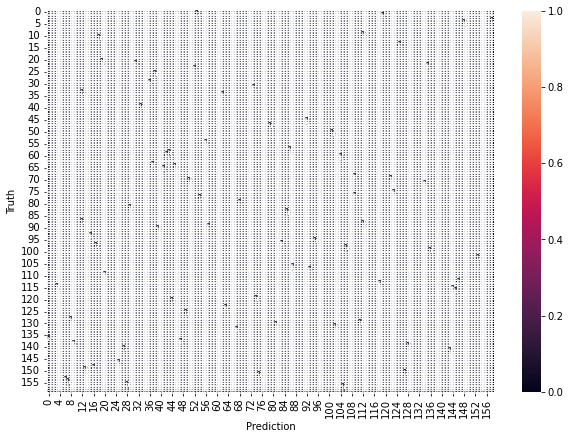

In [25]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

Text(69.0, 0.5, 'Truth')

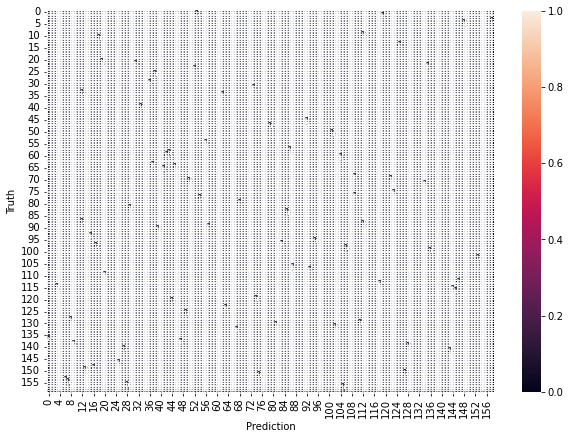

In [26]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')